# Eigen values

Author: [Nipun Batra](https://nipunbatra.github.io/), [Zeel B Patel](https://patel-zeel.github.io/)

In this notebook, we will look at eigen values.
https://youtu.be/PFDu9oVAE-g

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation

rc('font', size=16)
rc('text', usetex=True)
rc('animation', html='jshtml')

Consider a vector $\mathbf{v}_1$ below,   

$$
\mathbf{v}_1 = 
\begin{bmatrix}
2 & 1\\
\end{bmatrix}
$$

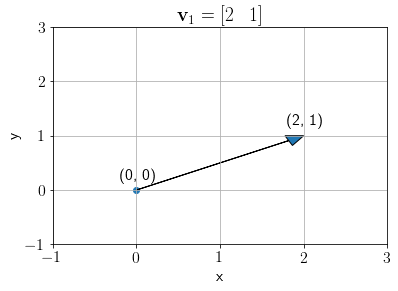

In [2]:
v1 = np.array([2, 1])

plt.arrow(x=0, y=0, dx=v1[0], dy=v1[1], shape='full', head_width=0.2, head_length=0.2, length_includes_head=True)
plt.text(0-0.2, 0+0.2, f'({0}, {0})')
plt.text(v1[0]-0.2, v1[1]+0.2, f'({v1[0]}, {v1[1]})')
plt.scatter(0, 0)
plt.grid()
plt.ylim((-1, 3))
plt.xlim(-1, 3);
plt.xlabel('x');plt.ylabel('y');
plt.title('$\mathbf{v}_1 = [2\;\;\;1]$');

$\mathbf{v}_1$ gets transformed to $\mathbf{v}_1'$ after applying a transformation $A$.

$$
\mathbf{v}_1' = A\mathbf{v}_1
$$

We define a useful function for plotting a linear transformation on any vector.

In [5]:
def plot_transformation(x, A, ax, annotate=False):
    arrow_in = ax.arrow(x=0, y=0, dx=x[0, 0], dy=x[1, 0], shape='full', head_width=0.4, 
                         head_length=0.4, color='green', lw=8, alpha=0.6, length_includes_head=True)
    ax.grid()
    
    # Applying transformation
    Ax = A@x
    
    # Get current min, max
    ymin, ymax = (min(Ax[1], x[1], 0)-1, max(Ax[1], x[1], 0)+1)
    xmin, xmax = (min(Ax[0], x[0], 0)-1, max(Ax[0], x[0], 0)+1)
    
    # Check and update according to previous
    ax.set_ylim(min(ymin, ax.set_ylim()[0]), max(ymax, ax.set_ylim()[1]))
    ax.set_xlim(min(xmin, ax.set_xlim()[0]), max(xmax, ax.set_xlim()[1]))
    
    arrow_out = ax.arrow(x=0, y=0, dx=Ax[0, 0], dy=Ax[1, 0], shape='full', head_width=0.4, 
                          head_length=0.4, color='red', length_includes_head=True)
    if annotate:
        ax.text(0-1, 0+0.2, f'({0}, {0})')
        ax.text(x[0, 0]-1, x[1, 0]+0.2, f'v1=({x[0, 0]}, {x[1, 0]})')
        ax.text(Ax[0, 0]-1, Ax[1, 0]+0.2, f'v1\'=({Ax[0, 0]}, {Ax[1, 0]})')
    ax.legend([arrow_in, arrow_out, ], ['Input','Transformed',], loc='lower right')
    ax.set_aspect('equal')
    ax.set_xlabel('x');ax.set_ylabel('y')

We plot the following transformation.

$$
A = 
\begin{bmatrix}
3 & 1\\
0 & 2
\end{bmatrix}
\mathbf{v}_1 = \begin{bmatrix}
2\\
1\\
\end{bmatrix}
$$

$$
\mathbf{v}_1' = A\mathbf{v}_1
$$

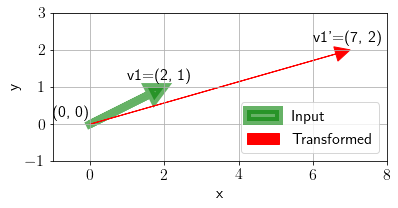

In [6]:
fig, ax = plt.subplots()
plot_transformation(np.array([2, 1]).reshape(-1, 1), np.array([[3, 1], [0, 2]]), ax, annotate=True);

Now, we define a function to subtract a scaler $\lambda$ from diagonal of $A$.   

In [7]:
def A_minus_lmd(A, lmd):
    A[0, 0] = A[0, 0] - lmd
    A[1, 1] = A[1, 1] - lmd
    return A

Transforming a random vector with $A-\boldsymbol{\lambda} I$ matrix.

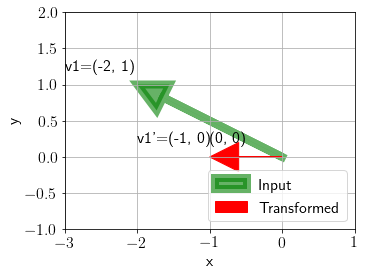

In [8]:
fig, ax = plt.subplots()
plot_transformation(np.array([-2, 1]).reshape(-1,1), A_minus_lmd(np.array([[3, 1], [0, 2]]), 2), ax, annotate=True);

Let us visualize many such random vectors after transforming with $A - \boldsymbol{\lambda} I$ (taking $\boldsymbol{\lambda} = 2$).

In [9]:
lmd = 2
fig, ax = plt.subplots()

def update(x):
    i, j = x
    ax.cla()
    plot_transformation(np.array([-i, j]).reshape(-1,1), A_minus_lmd(np.array([[3, 1], [0, 2]]), lmd), ax)
    ax.set_xlim(-11,11)
    ax.set_ylim(-11,11)

frames = []
for i in range(-5, 5, 1):
    for j in range(-5, 5, 1):
        frames.append((i, j))

plt.tight_layout()
anim = FuncAnimation(fig, update, frames)
plt.close()
anim

Now we visualize these random vectors after transforming with $A - \boldsymbol{\lambda} I$ (taking $\boldsymbol{\lambda} = 3$).

In [10]:
lmd = 3
fig, ax = plt.subplots()

def update(x):
    i, j = x
    ax.cla()
    plot_transformation(np.array([-i, j]).reshape(-1,1), A_minus_lmd(np.array([[3, 1], [0, 2]]), lmd), ax)
    ax.set_xlim(-11,11)
    ax.set_ylim(-11,11)

frames = []
for i in range(-5, 5, 1):
    for j in range(-5, 5, 1):
        frames.append((i, j))

plt.tight_layout()
anim = FuncAnimation(fig, update, frames)
plt.close()
anim

For these two values of lambda (eigen values), any input vector will be squished to the two red lines shown. As per definition of eigen values, $|A-\boldsymbol{\lambda} I|=0$, so new tranformation matrix becomes rank $1$.

Let us see the same phenomena mathematically.

For $\boldsymbol{\lambda} = 2$, we have

$$
\begin{bmatrix}
x'\\
y'
\end{bmatrix}
=
(A - 2I)\mathbf{v} = 
\begin{bmatrix}
3-2 & 1\\
0 & 2-2
\end{bmatrix}
\begin{bmatrix}
x\\
y
\end{bmatrix}
= 
\begin{bmatrix}
1 & 1\\
0 & 0
\end{bmatrix}
\begin{bmatrix}
x\\
y
\end{bmatrix} =
\begin{bmatrix}
x+y\\
0
\end{bmatrix}
$$

So, every transformation is lying on $y'=0$ line. 

For $\boldsymbol{\lambda} = 3$, we have

$$
\begin{bmatrix}
x'\\
y'
\end{bmatrix}
=
(A - 3I)\mathbf{v} = 
\begin{bmatrix}
3-3 & 1\\
0 & 2-3
\end{bmatrix}
\begin{bmatrix}
x\\
y
\end{bmatrix}
= 
\begin{bmatrix}
0 & 1\\
0 & -1
\end{bmatrix}
\begin{bmatrix}
x\\
y
\end{bmatrix} =
\begin{bmatrix}
y\\
-y
\end{bmatrix}
$$

So, every transformation is lying on $y'=-x'$ line. 

Let us take an input vector $[1\;\;\;-1]^T$ and visualize it's transformation with $A$.

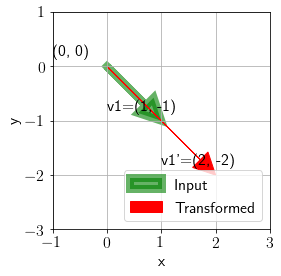

In [11]:
fig, ax = plt.subplots()
plot_transformation(np.array([1, -1]).reshape(-1,1), np.array([[3, 1], [0, 2]]), ax, annotate=True);

Note that this special vector is not changing direction but only the magnitude. All such special vectors under transformation $A$ are eigen vectors of $A$.

We can see that the transformed vector is $2$ times longer. This denotes that for eigen vector $\mathbf{e} = [1\;\;\;-1]^T$ corresponding eigen value is $2$.

Now, let us check for input vector $[1\;\;\;0]^T$, 

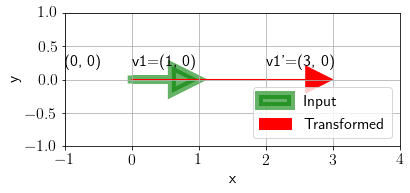

In [12]:
fig, ax = plt.subplots()
plot_transformation(np.array([1, 0]).reshape(-1,1), np.array([[3, 1], [0, 2]]), ax, annotate=True);

We can see that the transformed vector is $3$ times longer. This denotes that for eigen vector $\mathbf{e} = [1\;\;\;0]^T$ corresponding eigen value is $3$.